# *Term Deposit Subscription Prediction (Bank Marketing)*

<p style='font-size:20px;'><i> The objective of this task is to predict whether a bank customer will subscribe to a term deposit as a result of a marketing campaign. We will train classification models like Logistic Regression and Random Forest and use Explainable AI like SHAP for model interpretability.</i> </p>

## *Data Cleaning and Preprocessing*

### *Importing important libraries*

In [2]:
# Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### *Loading the dataset*

In [3]:
# Load the dataset into a pandas dataframe
df = pd.read_csv("bank-full.csv", sep=";", quotechar='"')

### *Displaying and analyzing the dataframe*

In [4]:
# Display the initial 5 rows of the dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# Get the number of rows and columns of the dataframe
df.shape

(45211, 17)

In [7]:
# Display concise overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# Display overall statistical summary of the numerical features
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### *Checking for nulls and duplicates*

In [9]:
# Check for any null values in the dataframe
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
# Check for duplicates in the dataframe
df.duplicated().sum()

0

## *Exploratory Data Analysis*

### *Univariate Analysis*

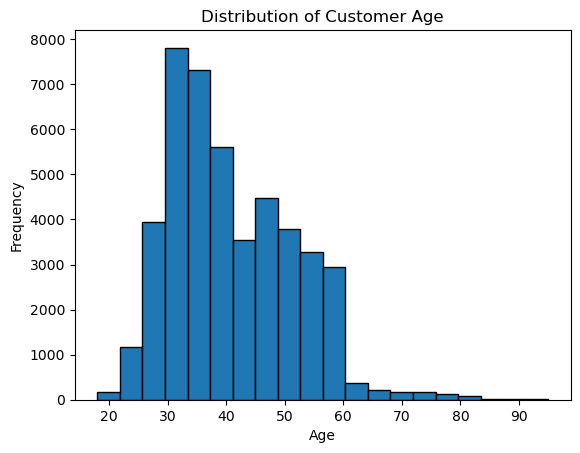

In [11]:
# Create a histogram for the customer age distribution
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

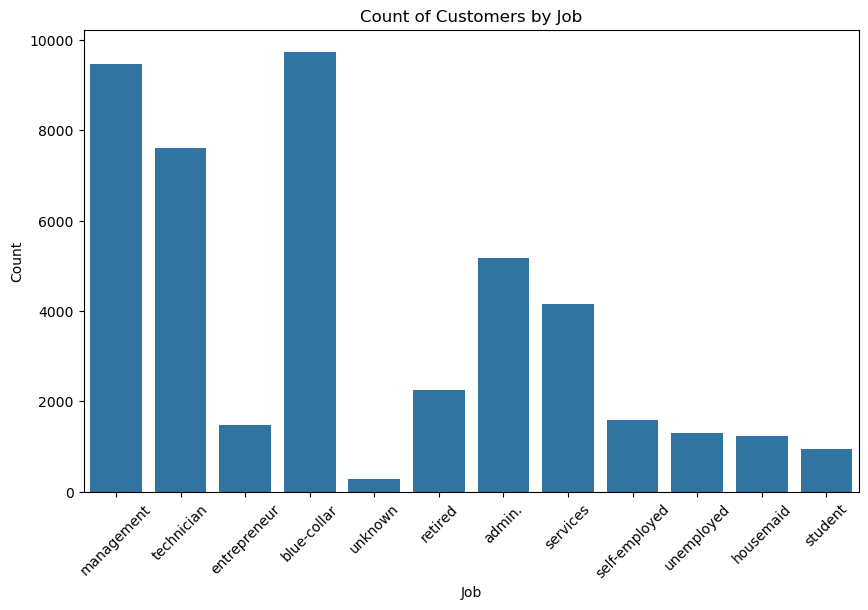

In [12]:
# Create a countplot for the customer jobs 
plt.figure(figsize=(10,6))
sns.countplot(x='job', data=df)
plt.title('Count of Customers by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

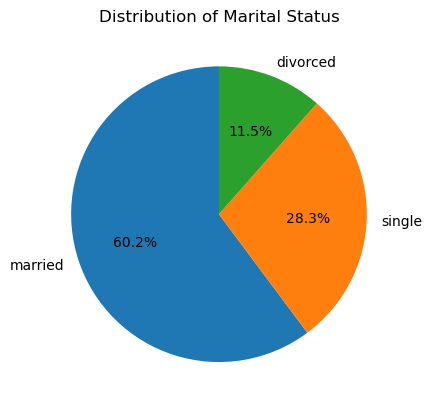

In [13]:
# Create a piechart to show distribution of marital status
marital_status_counts = df['marital'].value_counts()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Marital Status')
plt.show()

### *Target variable 'y' analysis*

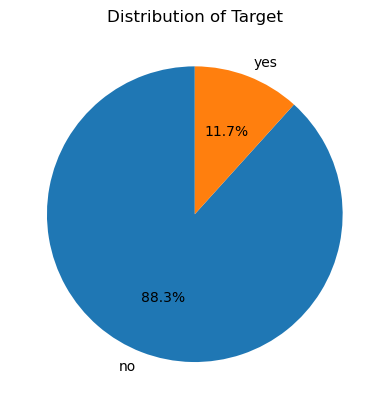

In [14]:
# Create a piechart for the target 'y'
target_y_counts = df['y'].value_counts()
plt.pie(target_y_counts, labels=target_y_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target')
plt.show()

### *Bivariate Analysis*

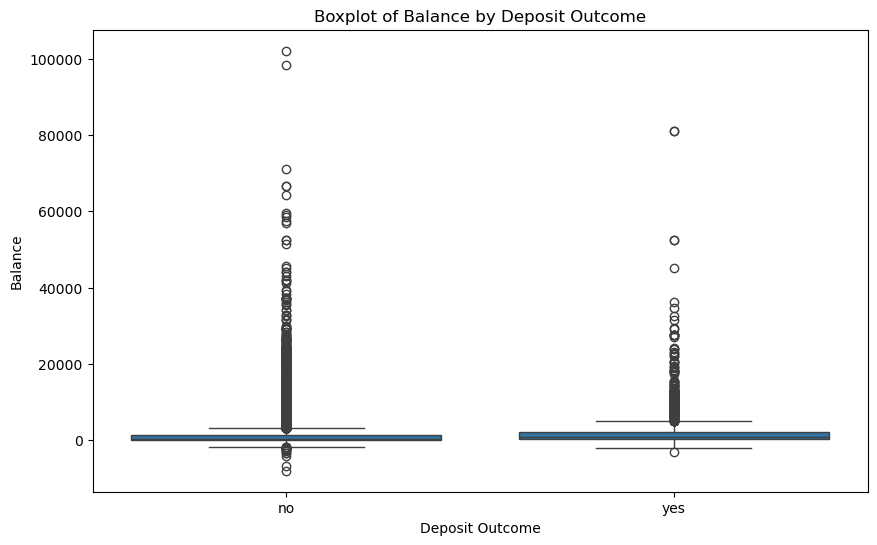

In [16]:
# Create a boxplot for balance vs target
plt.figure(figsize=(10,6))
sns.boxplot(x='y', y='balance', data=df)
plt.title('Boxplot of Balance by Deposit Outcome')
plt.xlabel('Deposit Outcome')
plt.ylabel('Balance')
plt.show()

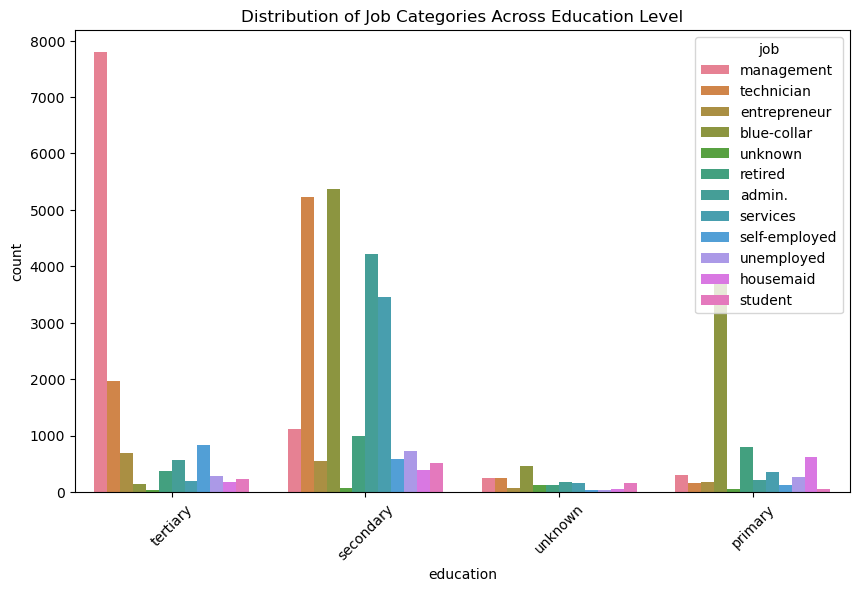

In [21]:
# Create a countplot for education vs job
plt.figure(figsize=(10,6))
sns.countplot(x='education', hue='job', data=df)
plt.title('Distribution of Job Categories Across Education Level')
plt.xticks(rotation=45)
plt.show()

### *Multivariate Analysis*

In [23]:
# Separate numerical features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]

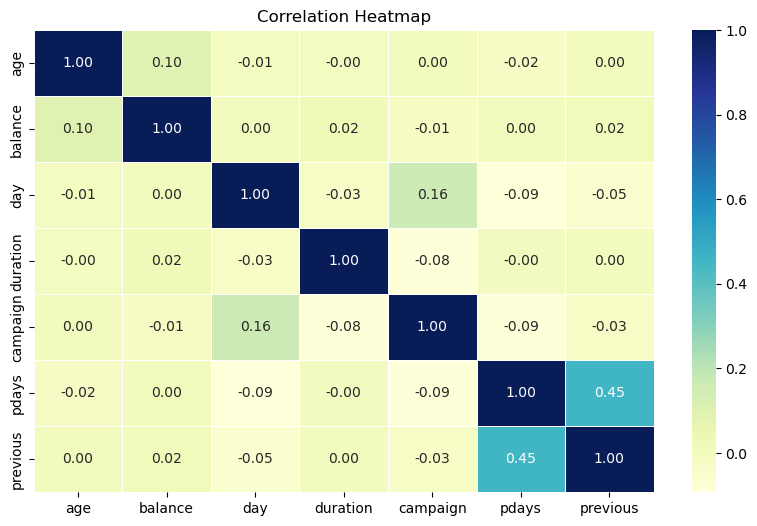

In [25]:
# Compute correlation matrix for the numerical features
correlation_matrix = numeric_data.corr()
# Plot correlation matrix using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

## *Feature Encoding*

In [26]:
# Import OneHotEncoder and OrdinalEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

### *Ordinal Encoding*

In [28]:
# List ordinal features along with their categories
education_order=['unknown', 'primary', 'secondary', 'tertiary']
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun','jul', 'aug', 'sep', 'oct', 'nov', 'dec']
ordinal_features=['education', 'month']

In [29]:
# Create an OrdinalEncoder instance 
ordinal_encoder = OrdinalEncoder(categories=[education_order, month_order])
# Apply Ordinal encoding on the ordinal features
df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features]).astype(int)

In [30]:
# Display the dataframe after applying Ordinal Encoding
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,4,261,1,-1,0,unknown,no
1,44,technician,single,2,no,29,yes,no,unknown,5,4,151,1,-1,0,unknown,no
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,4,76,1,-1,0,unknown,no
3,47,blue-collar,married,0,no,1506,yes,no,unknown,5,4,92,1,-1,0,unknown,no
4,33,unknown,single,0,no,1,no,no,unknown,5,4,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,no,no,cellular,17,10,977,3,-1,0,unknown,yes
45207,71,retired,divorced,1,no,1729,no,no,cellular,17,10,456,2,-1,0,unknown,yes
45208,72,retired,married,2,no,5715,no,no,cellular,17,10,1127,5,184,3,success,yes
45209,57,blue-collar,married,2,no,668,no,no,telephone,17,10,508,4,-1,0,unknown,no


### *One Hot Encoding*

In [31]:
# List the nominal features
nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [34]:
# Create an instance of OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
# Apply One Hot Encoding on the nominal features
ohe_arr = ohe.fit_transform(df[nominal_features]).astype(int)

In [35]:
# Convert the array back into a dataframe
df_ohe=pd.DataFrame(ohe_arr, columns=ohe.get_feature_names_out(nominal_features), index=df.index)
# Remove the original nominal columns
df=df.drop(columns=nominal_features)
# Concatenate the encoded dataframe with the original dataframe
df=pd.concat([df, df_ohe], axis=1)

### *Label Encoding*

In [36]:
# Label encoding the target variable 'y'
df['y']=df['y'].map({'no':0, 'yes':1})

In [37]:
# Display the final dataframe after encoding all the features
df

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,2143,5,4,261,1,-1,0,0,...,1,0,0,1,0,0,1,0,0,1
1,44,2,29,5,4,151,1,-1,0,0,...,0,1,0,1,0,0,1,0,0,1
2,33,2,2,5,4,76,1,-1,0,0,...,1,0,0,1,1,0,1,0,0,1
3,47,0,1506,5,4,92,1,-1,0,0,...,1,0,0,1,0,0,1,0,0,1
4,33,0,1,5,4,198,1,-1,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,825,17,10,977,3,-1,0,1,...,1,0,0,0,0,0,0,0,0,1
45207,71,1,1729,17,10,456,2,-1,0,1,...,0,0,0,0,0,0,0,0,0,1
45208,72,2,5715,17,10,1127,5,184,3,1,...,1,0,0,0,0,0,0,0,1,0
45209,57,2,668,17,10,508,4,-1,0,0,...,1,0,0,0,0,1,0,0,0,1


## *Building Classification Models*

### *Splitting train and test data*

In [54]:
# Separate features (x) and target variable (y)
x= df.drop('y', axis=1)
y=df['y']

In [55]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split
# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### *Addressing class imbalance*

In [41]:
# Import SMOTE from imblearn's over_Sampling module
from imblearn.over_sampling import SMOTE
# Create an instance of SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE to the training data
x_train_res,y_train_res = smote.fit_resample(x_train, y_train)

### *Feature Scaling*

In [42]:
# Import StandardScaler from sklearn's preprocessing module
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()
# Apply scaling to the input data
x_train_scaled = scaler.fit_transform(x_train_res)
x_test_scaled = scaler.transform(x_test)

## *Logistic Regression Model training*

In [43]:
# Import Logistic Regression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression
# Create an instance of LogisticRegression class
lr = LogisticRegression(class_weight='balanced', random_state=42)
# Train the model
lr.fit(x_train_scaled, y_train_res)

LogisticRegression(class_weight='balanced', random_state=42)

## *Random Forest Model training*

In [44]:
# Import RandomForest from sklearn's ensemble module 
from sklearn.ensemble import RandomForestClassifier
# Create an instance of RandomForest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
# Train the model
rf.fit(x_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

### *Models Predictions*

In [45]:
# Make predictions from both the trained models
y_pred_lr = lr.predict(x_test_scaled)
y_pred_rf = rf.predict(x_test)

### *Models Evaluation*

In [46]:
# Import evaluation metrics from sklearn's metric module
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
# Print the F1 Score for both models
print('Logistic Regression F1:', f1_score(y_test, y_pred_lr))
print('Random Forest F1:', f1_score(y_test,y_pred_rf))

Logistic Regression F1: 0.4737063525452251
Random Forest F1: 0.552007299270073


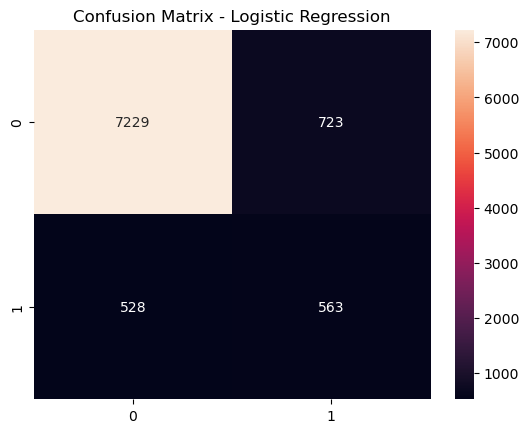

In [47]:
# Display the confusion matrix for LogisticRegresion model 
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


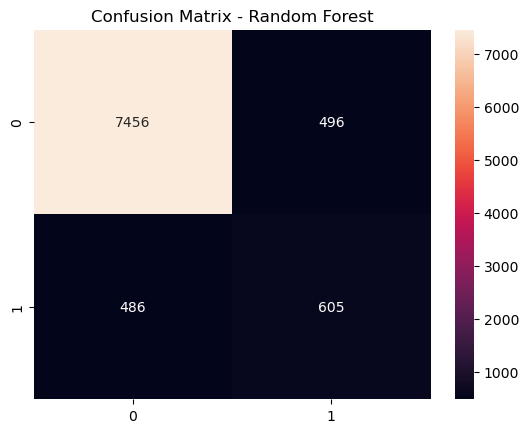

In [48]:
# Display confusion matrix for RandomForest model
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()

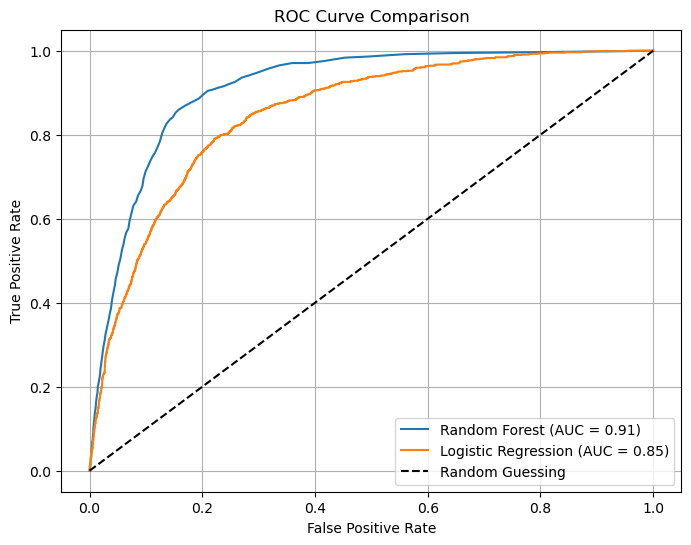

In [49]:
# Get predicted probabilities
y_probs_rf = rf.predict_proba(x_test)[:, 1]
y_probs_lr = lr.predict_proba(x_test_scaled)[:, 1]

# Compute ROC curve points
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)

# Compute ROC AUC scores
auc_rf = roc_auc_score(y_test, y_probs_rf)
auc_lr = roc_auc_score(y_test, y_probs_lr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## *Model Interpretability*

In [50]:
import shap

# Use only a small sample for background
background = shap.utils.sample(x_train, 100, random_state=42)

# Explain only first 5 predictions
x_explain = x_test[:5]

# Initialize a SHAP explainer object using our random forest model
explainer = shap.Explainer(rf)

# Compute SHAP values (feature importance values) for each prediction in x_explain
shap_values = explainer(x_explain)

In [51]:
from IPython.display import display

# Initialize SHAP JavaScript visualization
shap.initjs()

# Loop through each of the 5 instances
for i in range(5):
    display(shap.force_plot(
        base_value=shap_values.base_values[i][1],        # base value for class 1
        shap_values=shap_values.values[i][:, 1],         # SHAP values for class 1
        features=x_explain.iloc[i].values,               # feature values for this instance
        feature_names=x.columns.tolist()                 # names of features
    ))


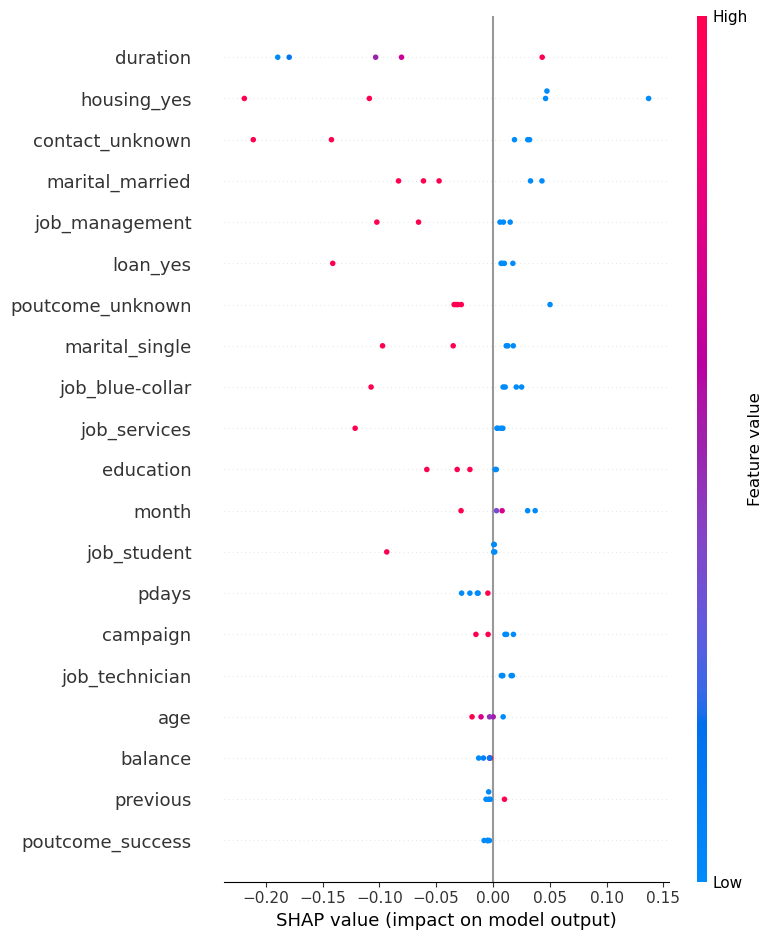

In [52]:
# Create a summary plot of SHAP values
shap.summary_plot(shap_values[...,1], x_explain, feature_names=x.columns.tolist())

# Conclusion

<p style='font-size:20px;'><i>The SHAP analysis reveals that the most influential feature is duration, where longer durations strongly increase the likelihood of a positive prediction. Other important features like poutcome_success, housing, and contact type also significantly impact model output. In general:</i></p>
<ul style='font-size:20px;'><i>
<li>High values of key features (e.g., long duration, successful previous outcomes) tend to push predictions toward the positive class.</li>
<li>Low or missing feature values (e.g., unknown contact method, no prior success) tend to reduce the prediction confidence.</li>
</i></ul>
<p style='font-size:20px;'><i>This interpretability helps us understand the reasoning behind model predictions and can guide future data collection, customer targeting strategies, or decision-making processes.</i></p>